In [12]:
# Descargar librerias para manipulación de datos 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# Importar datasets (Se ha realizado el ETL, donde se realizo parte del EDA, para corroborar formatos y valores)
velocidades_provincia = pd.read_csv(r"ACCES-A-INTER-FIJO-23248.csv")
tecnologia_provincia = pd.read_csv(r"ACCES-A-INTER-FIJO-POR.csv")
ingresos_macroeconomia = pd.read_csv(r"Ingresos+Macroeconomia.csv")
penetracion_hogares = pd.read_csv(r"PENET-DEL-INTER-FIJO-51614.csv")
penetracion_hab = pd.read_csv(r"PENET-DEL-INTER-FIJO-POR.csv")
tecnologia_partido = pd.read_csv(r"Tecnologia por Partido.csv")
tecnologia_partido = pd.read_csv(r"Tecnologia por Partido.csv")
velocidad_promedio_provincia = pd.read_csv(r"Velocidad Promedio de Bajada.csv")


Comienzo el EDA

Acceso por Rangos de Velocidades por Provincia

In [14]:
velocidades_provincia.head(10)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,4721668
1,2022,3,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,710,3840,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,4610,9870,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,1090,1444,45707,3094,34682,15309,17563,20024,165778
5,2022,3,Córdoba,990,11312,153324,111615,70989,27112,650344,13873,1038668
6,2022,3,Corrientes,670,3865,23427,23948,7776,21706,56950,7107,144846
7,2022,3,Entre Ríos,1070,5549,47210,46855,18263,32021,102195,16759,268959
8,2022,3,Formosa,970,3070,23538,19545,6194,5640,17704,5890,68538
9,2022,3,Jujuy,580,1879,19135,15254,36083,5190,45895,0,118823


In [15]:
# Exploramos la infomación de nuestros datos 
velocidades_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    int64 
 1   Trimestre            840 non-null    int64 
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    int64 
 4   + 512 Kbps - 1 Mbps  840 non-null    int64 
 5   + 1 Mbps - 6 Mbps    840 non-null    int64 
 6   + 6 Mbps - 10 Mbps   840 non-null    int64 
 7   + 10 Mbps - 20 Mbps  840 non-null    int64 
 8   + 20 Mbps - 30 Mbps  840 non-null    int64 
 9   + 30 Mbps            840 non-null    int64 
 10  OTROS                840 non-null    int64 
 11  Total                840 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 78.9+ KB


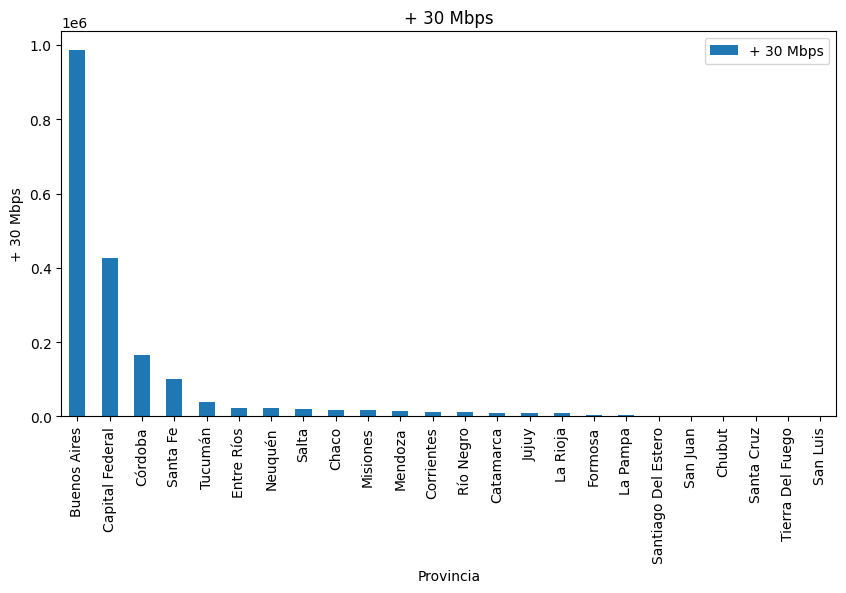

In [87]:
provincia_group = velocidades_provincia.groupby('Provincia').mean().sort_values('+ 30 Mbps', ascending=False)
provincia_group.plot(kind='bar', y='+ 30 Mbps', figsize=(10, 5))
plt.ylabel('+ 30 Mbps')
plt.title('+ 30 Mbps')
plt.show()

In [17]:
velocidades_provincia.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,840.000000,8.400000e+02
mean,2017.885714,2.457143,2898.440476,10374.467857,1.509700e+05,33783.186905,34638.141667,19442.944048,7.917956e+04,4898.216667,3.439888e+05
std,2.528745,1.105009,10900.554628,21587.794231,3.481538e+05,60759.295096,87389.351535,70347.380887,3.426234e+05,12102.988402,7.373366e+05
min,2014.000000,1.000000,60.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,320.000000,1347.000000,2.853925e+04,2967.750000,2039.500000,190.000000,7.000000e+00,0.000000,5.232825e+04
50%,2018.000000,2.000000,1050.000000,3760.500000,4.883450e+04,8303.500000,7766.000000,2214.500000,8.825000e+02,0.000000,1.043330e+05
75%,2020.000000,3.000000,2565.750000,8328.250000,8.689750e+04,29956.000000,24396.500000,9284.000000,1.966075e+04,5094.000000,1.775798e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.618689e+06,120464.000000,4.721668e+06


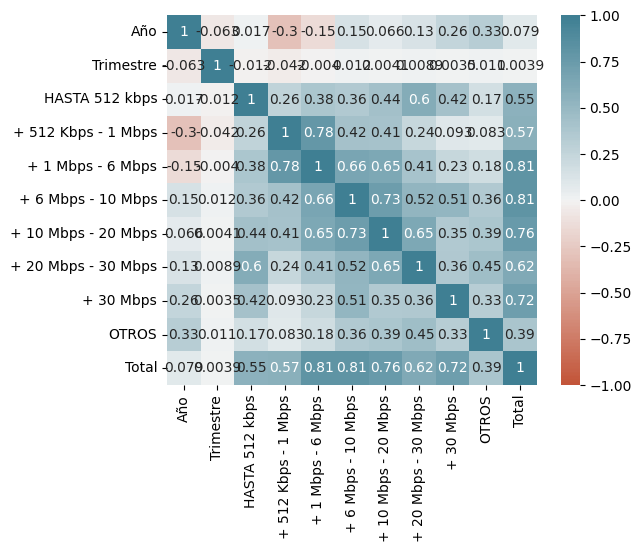

In [19]:
corr_matrix = velocidades_provincia.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

In [20]:
# Observamos que puede ser util estudiar el porcentaje del total que representa cad auna de las velocidades
df = velocidades_provincia
df['% HASTA 512 kbps'] = (df['HASTA 512 kbps'] / df['Total']) * 100
df['% + 512 Kbps - 1 Mbps'] = (df['+ 512 Kbps - 1 Mbps'] / df['Total']) * 100
df['% + 1 Mbps - 6 Mbps'] = (df['+ 1 Mbps - 6 Mbps'] / df['Total']) * 100
df['% + 6 Mbps - 10 Mbps'] = (df['+ 6 Mbps - 10 Mbps'] / df['Total']) * 100
df['% + 10 Mbps - 20 Mbps'] = (df['+ 10 Mbps - 20 Mbps'] / df['Total']) * 100
df['% + 20 Mbps - 30 Mbps'] = (df['+ 20 Mbps - 30 Mbps'] / df['Total']) * 100
df['% + 30 Mbps'] = (df['+ 30 Mbps'] / df['Total']) * 100
df['% OTROS'] = (df['OTROS'] / df['Total']) * 100
df = df.drop(['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'], axis=1)
df = round(df,2)
df.head(10)


,Año,Trimestre,Provincia,Total,% HASTA 512 kbps,% + 512 Kbps - 1 Mbps,% + 1 Mbps - 6 Mbps,% + 6 Mbps - 10 Mbps,% + 10 Mbps - 20 Mbps,% + 20 Mbps - 30 Mbps,% + 30 Mbps,% OTROS
0,2022,3,Buenos Aires,4721668,0.64,0.59,6.15,6.31,5.66,0.26,76.64,1.39
1,2022,3,Capital Federal,1547679,0.33,0.37,2.22,4.38,3.36,1.85,80.97,6.82
2,2022,3,Catamarca,70293,1.01,5.46,4.42,7.67,7.25,5.32,71.55,3.14
3,2022,3,Chaco,144146,3.20,6.85,11.64,13.14,5.58,10.98,55.08,2.57
4,2022,3,Chubut,165778,0.66,0.87,27.57,1.87,20.92,9.23,10.59,12.08
5,2022,3,Córdoba,1038668,0.10,1.09,14.76,10.75,6.83,2.61,62.61,1.34
6,2022,3,Corrientes,144846,0.46,2.67,16.17,16.53,5.37,14.99,39.32,4.91
7,2022,3,Entre Ríos,268959,0.40,2.06,17.55,17.42,6.79,11.91,38.00,6.23
8,2022,3,Formosa,68538,1.42,4.48,34.34,28.52,9.04,8.23,25.83,8.59
9,2022,3,Jujuy,118823,0.49,1.58,16.10,12.84,30.37,4.37,38.62,0.00


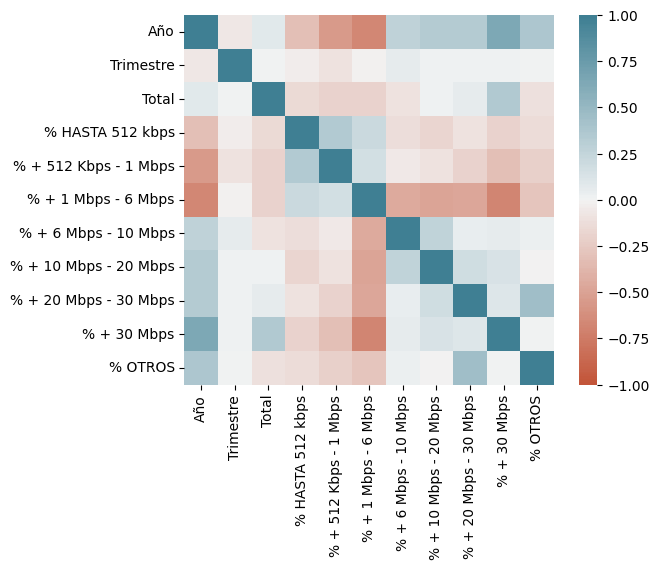

In [21]:
corr_matrix = df.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False
)

De esta correlacion podemos observar que hay una relacion en el porcentaje de 1-6 Mbps cae cuando aumentan los porcentajes de +10Mbps, especialmente con +30Mbps.
Por otro lado vemos que al pasar de los años, las tecnologias con menor velocidad decrecen y las de mayor velocidad crecen, en especial +30 Mbps

Tecnologias por Provincia


In [ ]:
tecnologia_provincia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           841 non-null    object
 1   Trimestre     841 non-null    object
 2   Provincia     841 non-null    object
 3   ADSL          841 non-null    int64 
 4   Cablemodem    841 non-null    int64 
 5   Fibra óptica  841 non-null    int64 
 6   Wireless      841 non-null    int64 
 7   Otros         841 non-null    int64 
 8   Total         841 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 59.3+ KB


In [ ]:
tecnologia_provincia.head(10)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,% ADSL,% Cablemodem,% Fibra óptica,% Wireless,% Otros
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,7.193390,58.206655,30.422152,2.686466,1.491337
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,9.096912,80.128050,8.349147,0.372041,2.053850
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293,14.240394,14.930363,65.759037,1.890658,3.179548
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146,18.844782,42.873198,30.972070,5.673414,1.636535
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778,27.372148,43.559459,5.775193,17.966196,5.327004
5,2022,3,Córdoba,163770,465461,338570,6107,9797,1038668,15.767310,44.813261,32.596556,0.587965,0.943227
6,2022,3,Corrientes,36508,77140,18619,7256,5323,144846,25.204700,53.256562,12.854342,5.009458,3.674938
7,2022,3,Entre Ríos,60345,132952,36971,26098,12593,268959,22.436505,49.432070,13.745961,9.703338,4.682126
8,2022,3,Formosa,14470,25880,11041,16935,2120,68538,21.112376,37.760075,16.109312,24.708921,3.093175
9,2022,3,Jujuy,19257,52978,40172,4033,2383,118823,16.206458,44.585644,33.808269,3.394124,2.005504


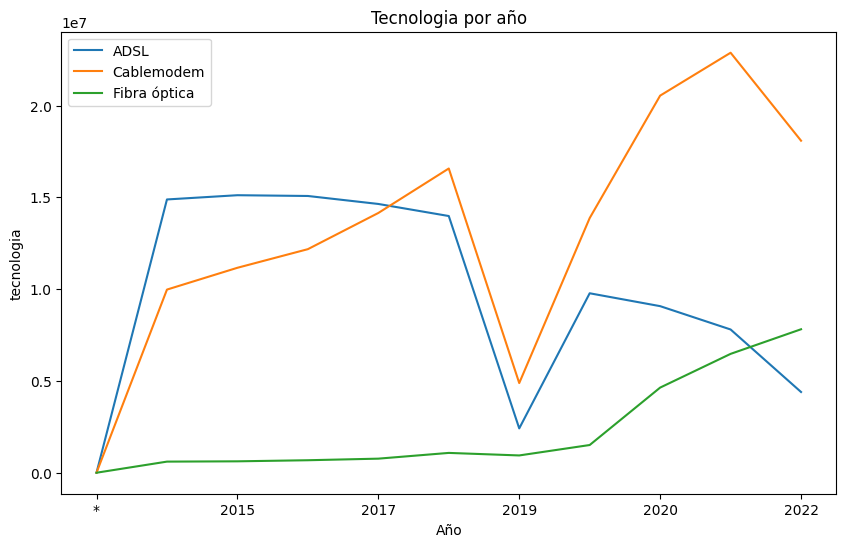

In [35]:
tecnologia_provincia2 = tecnologia_provincia.groupby('Año').sum()

data = tecnologia_provincia2
fig, ax = plt.subplots(figsize=(10, 6))
data[['ADSL', 'Cablemodem',"Fibra óptica"]].plot(ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Año')
ax.set_ylabel('tecnologia')
ax.set_title('Tecnologia por año')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()








Notamos que la fibra optica esta en ascenso mientras que adsl en descenso y cablemodem comienza al final a tener un comportamiento a la baja

In [ ]:
df = tecnologia_provincia
df['% ADSL'] = (df['ADSL'] / df['Total']) * 100
df['% Cablemodem'] = (df['Cablemodem'] / df['Total']) * 100
df['% Fibra óptica'] = (df['Fibra óptica'] / df['Total']) * 100
df['% Wireless'] = (df['Wireless'] / df['Total']) * 100
df['% Otros'] = (df['Otros'] / df['Total']) * 100
df = df.drop(['ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros'], axis=1)
df = round(df,2)

df.head(10)



,Año,Trimestre,Provincia,Total,% ADSL,% Cablemodem,% Fibra óptica,% Wireless,% Otros
0,2022,3,Buenos Aires,4721668,7.19,58.21,30.42,2.69,1.49
1,2022,3,Capital Federal,1547679,9.10,80.13,8.35,0.37,2.05
2,2022,3,Catamarca,70293,14.24,14.93,65.76,1.89,3.18
3,2022,3,Chaco,144146,18.84,42.87,30.97,5.67,1.64
4,2022,3,Chubut,165778,27.37,43.56,5.78,17.97,5.33
5,2022,3,Córdoba,1038668,15.77,44.81,32.60,0.59,0.94
6,2022,3,Corrientes,144846,25.20,53.26,12.85,5.01,3.67
7,2022,3,Entre Ríos,268959,22.44,49.43,13.75,9.70,4.68
8,2022,3,Formosa,68538,21.11,37.76,16.11,24.71,3.09
9,2022,3,Jujuy,118823,16.21,44.59,33.81,3.39,2.01


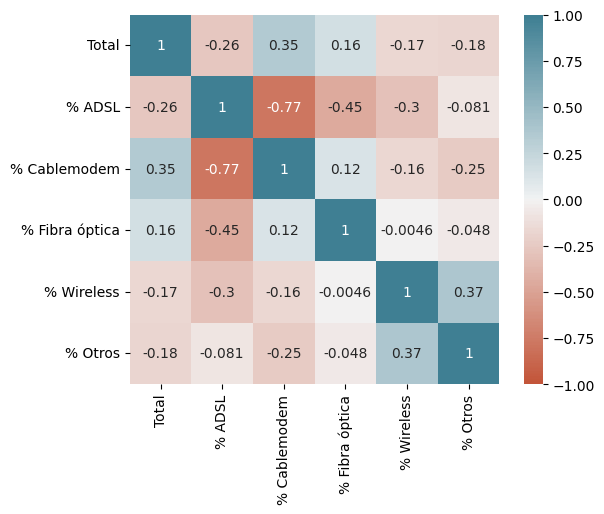

In [ ]:
corr_matrix = df.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

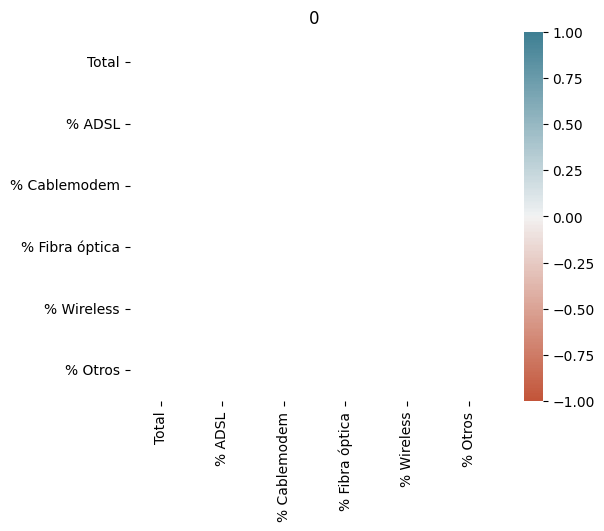

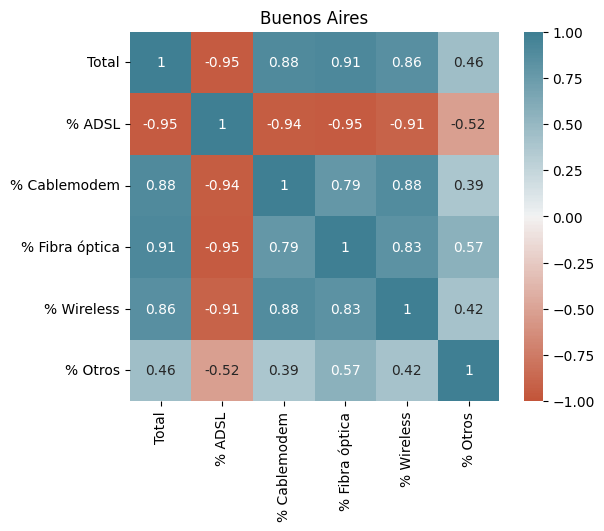

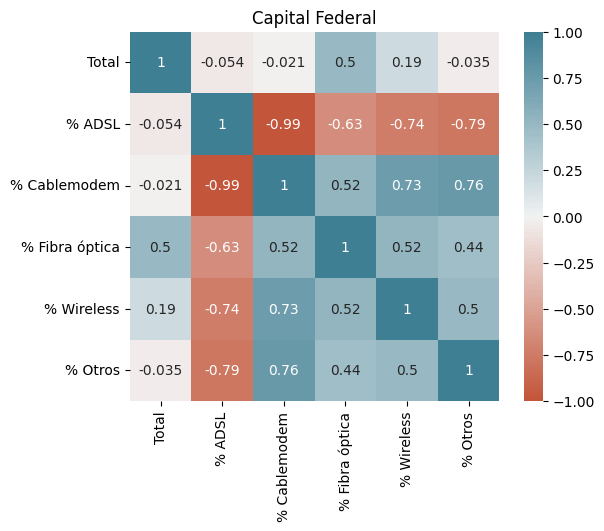

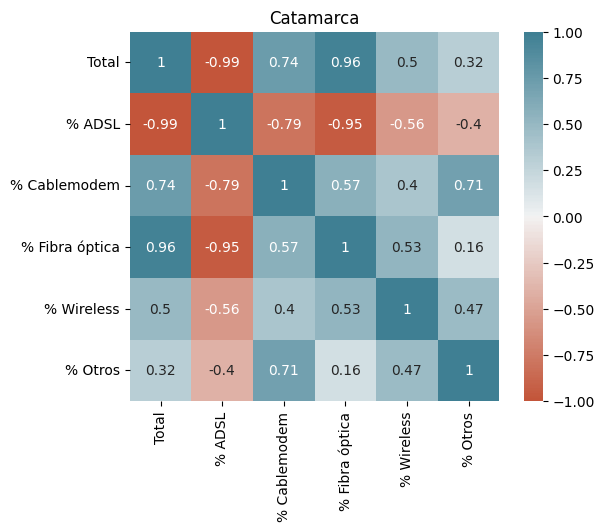

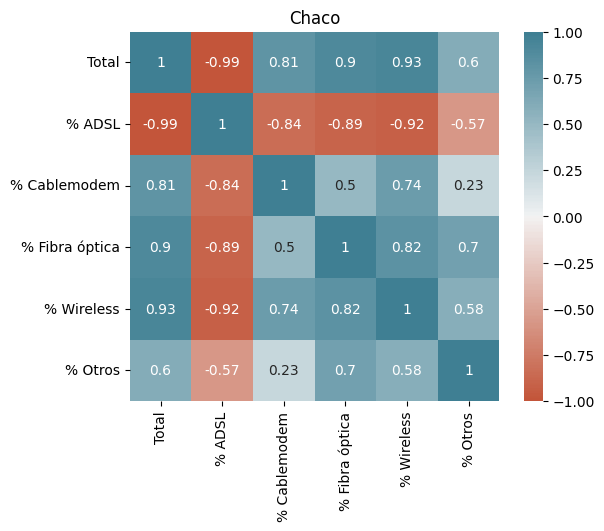

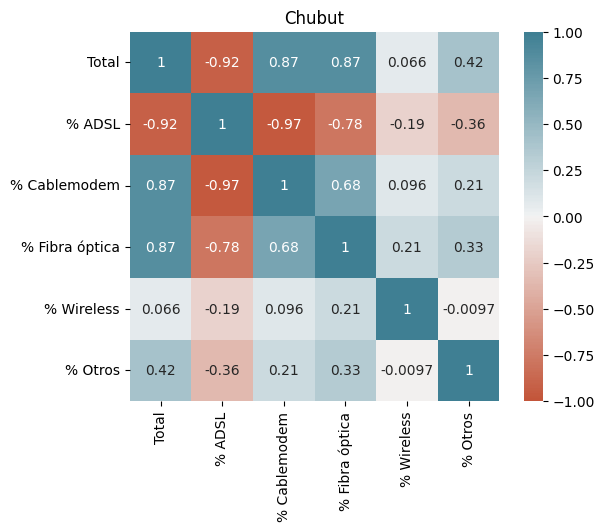

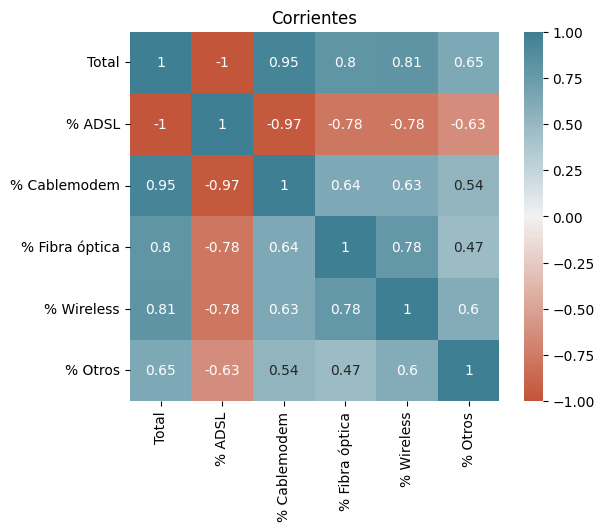

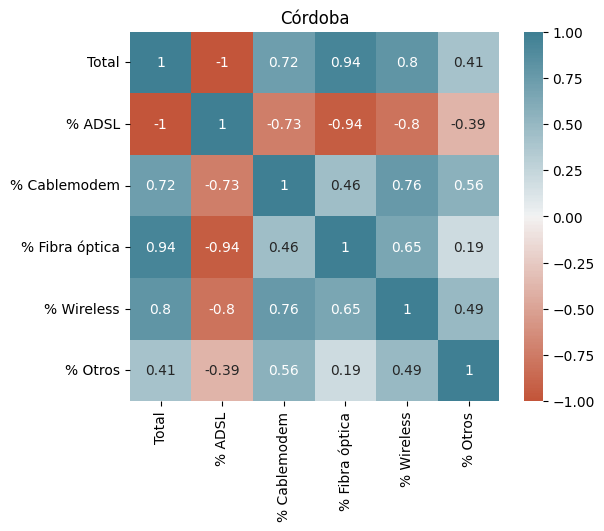

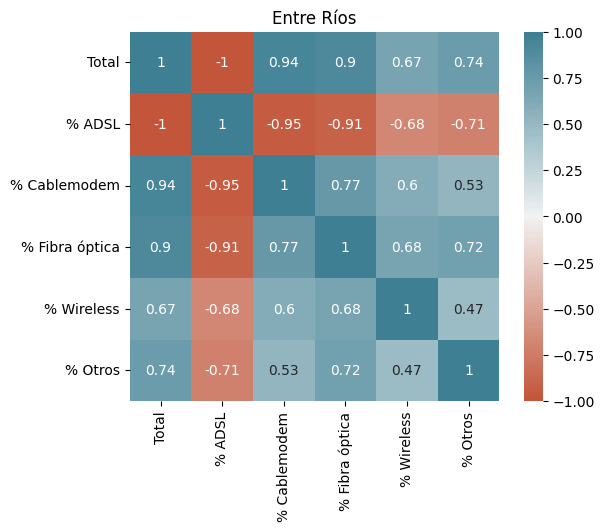

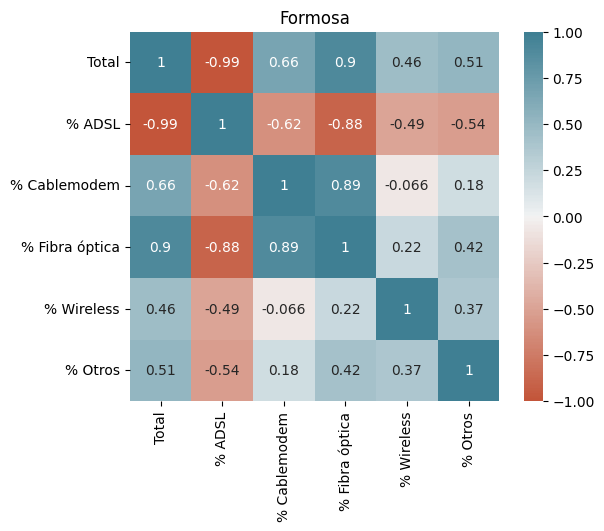

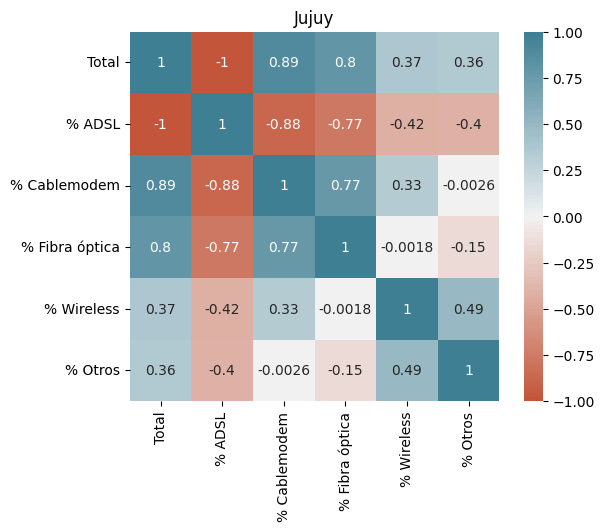

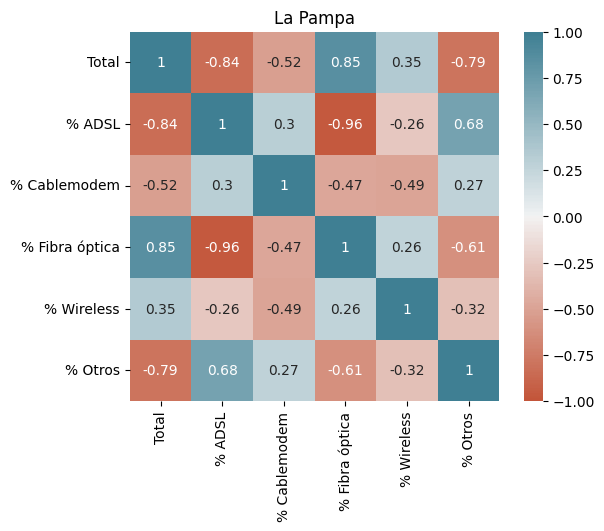

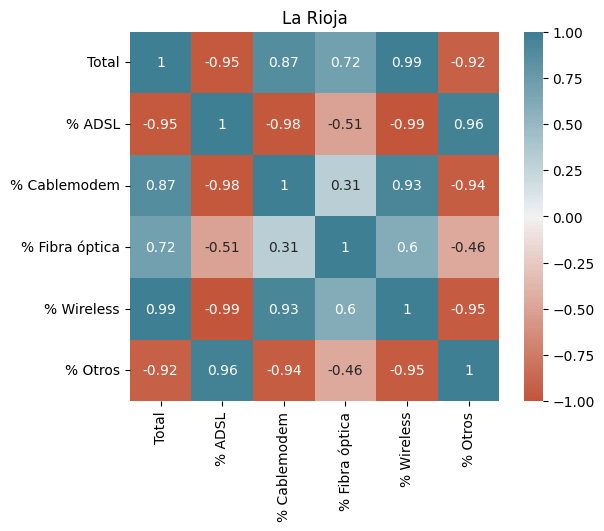

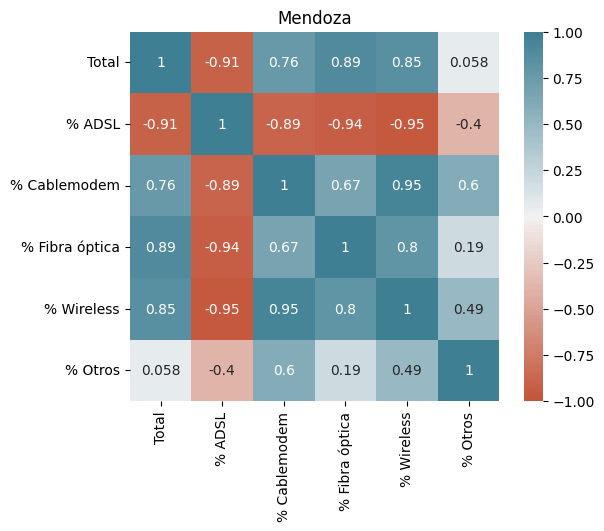

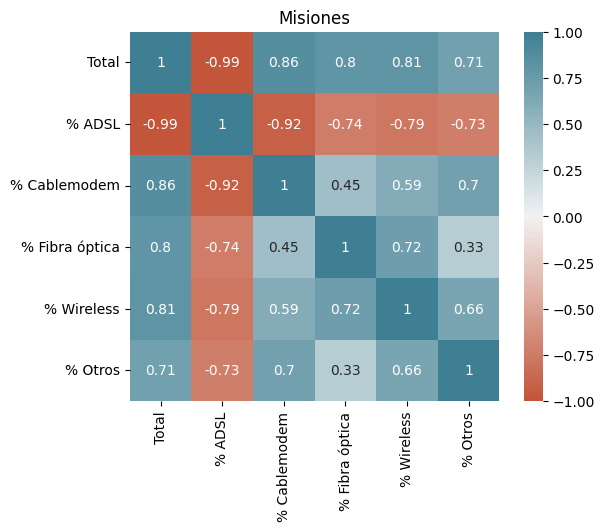

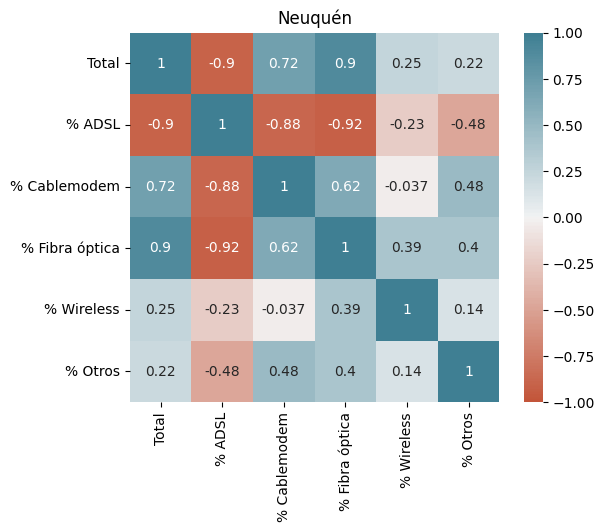

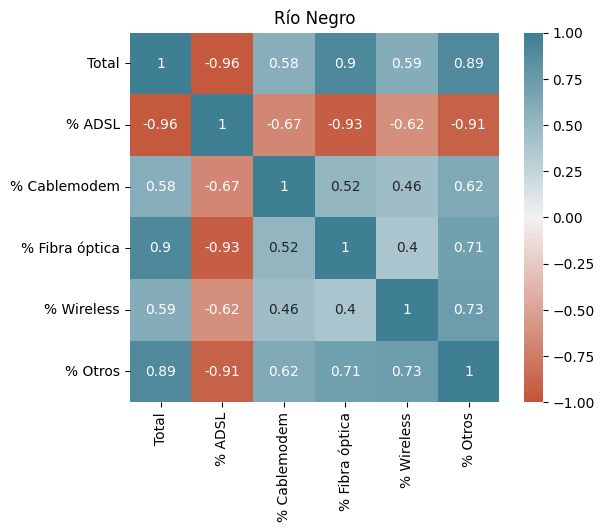

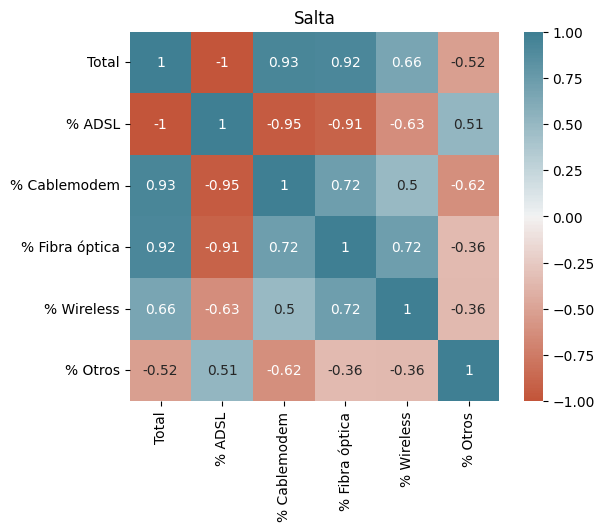

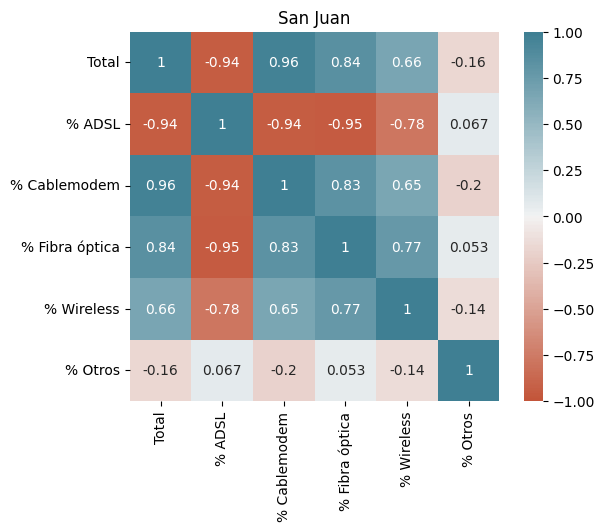

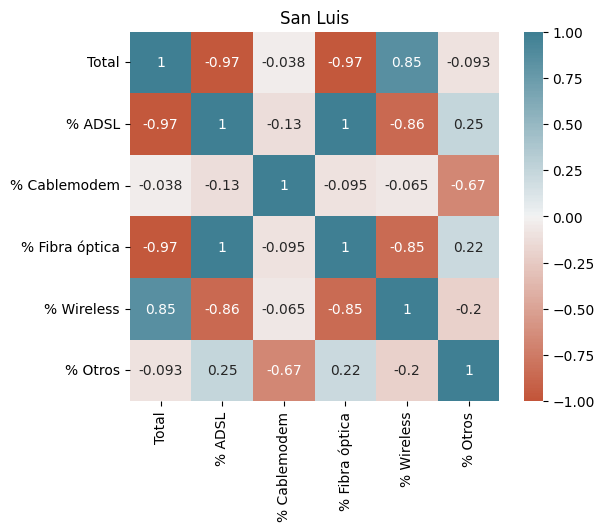

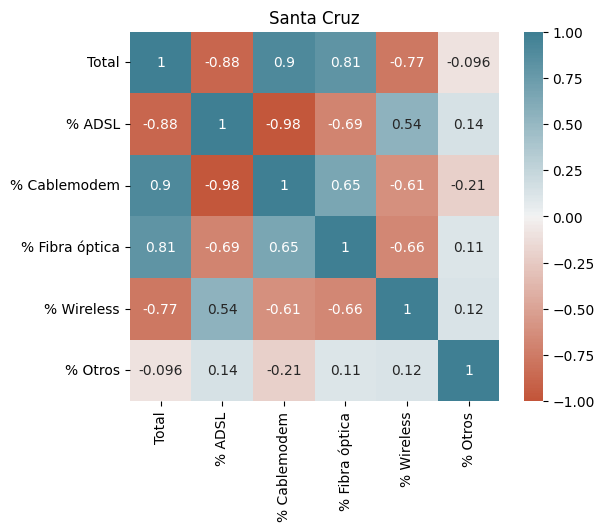

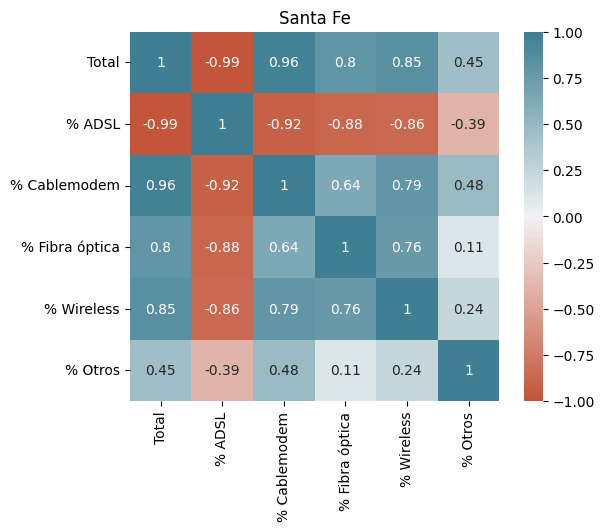

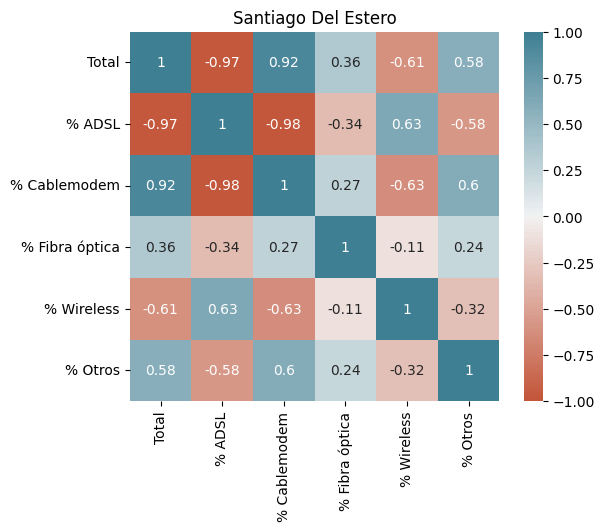

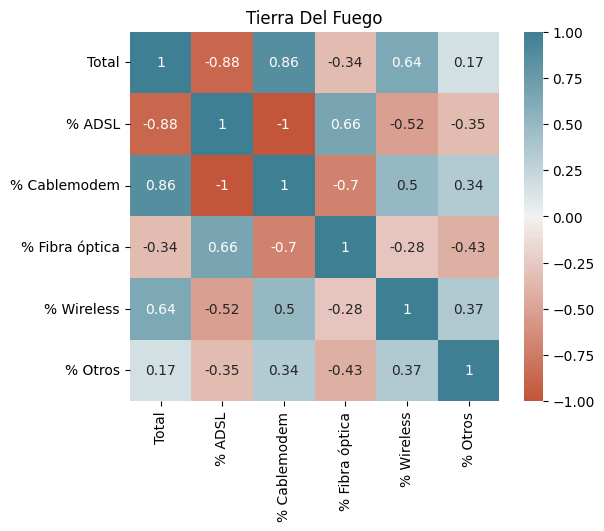

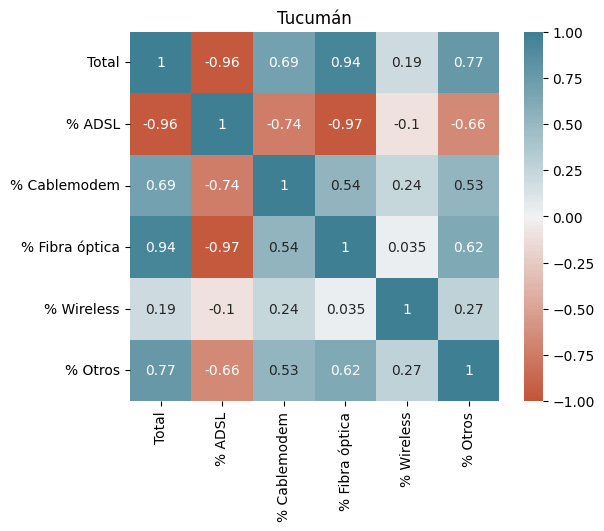

In [ ]:
provincias = df.groupby('Provincia')

# Generar un mapa de calor para cada grupo
for provincia, datos_provincia in provincias:
    corr_matrix = datos_provincia.corr()
    ax = sns.heatmap(
        corr_matrix, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True
    )
    ax.set_title(provincia)
    plt.show()

En Lineas generales se puede ver que La porcion del mercado de ADSL la va tomando principalmente Cablemodem y Fibra Optica, teniendo mayor importancia una tecnología un otra en las diferentes provincias.

Analizamos los ingresos y las variables macroeconomicas

In [ ]:
ingresos_macroeconomia.head()

,Año,Trimestre,IPC AR,PBI millones,Dolar Blue,Dolar Oficial,Ingresos (miles de pesos),Ingresos Dolar Oficial,Ingresos Dolar Blue,PBI dolar Oficial,PBI dola Blue
0,2013,1,298.0,2888981.0,8.0,5.0,NaN,NaN,NaN,574731.0,359774.0
1,2013,2,309.0,3387811.0,9.0,5.0,NaN,NaN,NaN,644070.0,389105.0
2,2013,3,331.0,3436547.0,9.0,6.0,NaN,NaN,NaN,610399.0,380289.0
3,2013,4,351.0,3679896.0,10.0,6.0,NaN,NaN,NaN,597063.0,376139.0
4,2014,1,402.0,3917649.0,11.0,8.0,2984054.0,379329.0,270867.0,498006.0,355611.0


In [23]:
# Filtramos los datos para los datos entre los años 2014 y 2022
ingresos_macroeconomia_fil = ingresos_macroeconomia[(ingresos_macroeconomia["Año"]>2013) & (ingresos_macroeconomia["Año"]<2023)]


In [24]:
ingresos_macroeconomia_fil.head()

,Año,Trimestre,IPC AR,PBI millones,Dolar Blue,Dolar Oficial,Ingresos (miles de pesos),Ingresos Dolar Oficial,Ingresos Dolar Blue,PBI dolar Oficial,PBI dola Blue
4,2014,1,402.0,3917649.0,11.0,8.0,2984054.0,379329.0,270867.0,498006.0,355611.0
5,2014,2,433.0,4702630.0,11.0,8.0,3270816.0,408852.0,290309.0,587829.0,417393.0
6,2014,3,461.0,4685503.0,14.0,8.0,3478638.0,421994.0,247590.0,568399.0,333488.0
7,2014,4,491.0,5010564.0,14.0,8.0,3950441.0,468617.0,289905.0,594373.0,367703.0
8,2015,1,518.0,5092694.0,13.0,9.0,4876385.0,564832.0,375588.0,589887.0,392249.0


In [25]:
ingresos_macroeconomia_fil.describe()

,Año,Trimestre,IPC AR,PBI millones,Dolar Blue,Dolar Oficial,Ingresos (miles de pesos),Ingresos Dolar Oficial,Ingresos Dolar Blue,PBI dolar Oficial,PBI dola Blue
count,36.000000,36.000000,34.000000,3.400000e+01,36.000000,36.000000,3.500000e+01,35.000000,35.000000,34.000000,34.000000
mean,2018.000000,2.500000,937.323529,3.796723e+06,75.500000,46.861111,2.058845e+07,489473.542857,384952.742857,299259.676471,248891.970588
std,2.618615,1.133893,279.986441,4.263989e+06,85.089365,42.672944,1.774214e+07,71870.967191,129623.396425,306102.660603,263731.366381
min,2014.000000,1.000000,402.000000,0.000000e+00,11.000000,8.000000,2.984054e+06,379329.000000,213176.000000,0.000000,0.000000
25%,2016.000000,1.750000,710.500000,0.000000e+00,15.000000,14.000000,6.235543e+06,429907.500000,271683.500000,0.000000,0.000000
50%,2018.000000,2.500000,1126.000000,1.958824e+06,29.500000,29.000000,1.431947e+07,483878.000000,366850.000000,240208.500000,166744.000000
75%,2020.000000,3.250000,1169.000000,6.860169e+06,136.000000,74.750000,3.204996e+07,524114.500000,465034.000000,593340.500000,472629.750000
max,2022.000000,4.000000,1169.000000,1.197580e+07,313.000000,165.000000,6.705593e+07,668037.000000,660113.000000,675541.000000,661921.000000


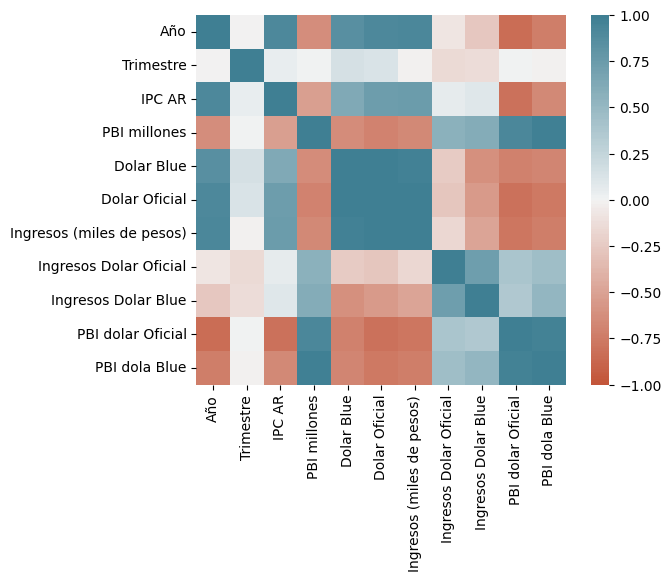

In [27]:
corr_matrix = ingresos_macroeconomia_fil.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False
)

Aqui no se observa ninguna correlacion importante entre los ingresos dolar oficial y otra variable importante (los datos de pbi estan incompletos)

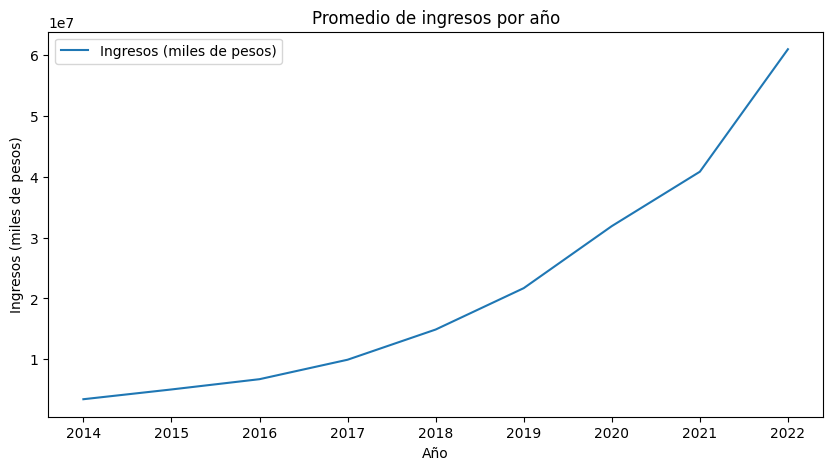

In [28]:
# Calculo el promedio de ingresos por año y ordenar los datos de forma ascendente
ingresos_por_anio = ingresos_macroeconomia_fil.groupby('Año').mean().sort_values('Ingresos (miles de pesos)', ascending=True)

# Creo la línea de tiempo
ingresos_por_anio.plot(kind='line', y='Ingresos (miles de pesos)', figsize=(10, 5))

# Agrego etiquetas y título al gráfico
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Promedio de ingresos por año')
plt.show()

Hacemos una serie historica de los ingresos en miles de dolares oficiales

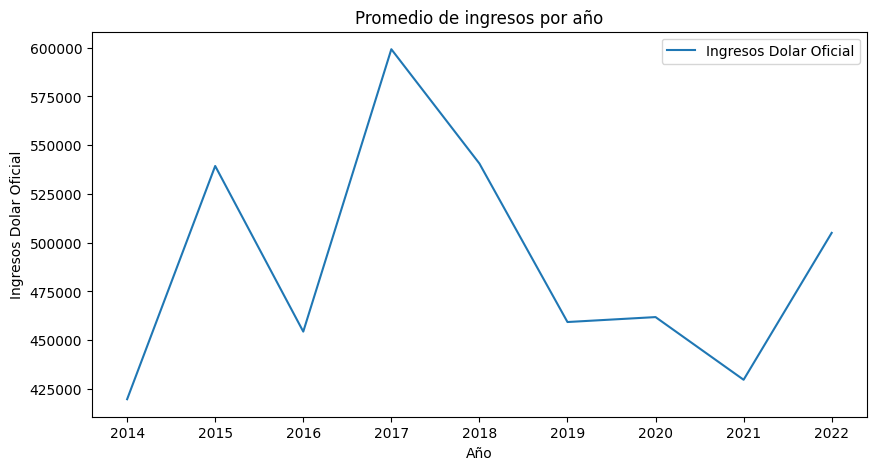

In [29]:
# Calculo el promedio de ingresos por año y ordenar los datos de forma ascendente
ingresos_por_anio = ingresos_macroeconomia_fil.groupby('Año').mean().sort_values('Ingresos (miles de pesos)', ascending=True)

# Creo la línea de tiempo
ingresos_por_anio.plot(kind='line', y='Ingresos Dolar Oficial', figsize=(10, 5))

# Agrego etiquetas y título al gráfico
plt.ylabel('Ingresos Dolar Oficial')
plt.title('Promedio de ingresos por año')
plt.show()

Analizamos la penetracion

In [80]:
penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [74]:
# Reemplazar la coma por un punto en la columna "Accesos por cada 100 hogares" y convertirla a flotante


# Agrupar los datos por año y trimestre y sumar la columna de "Accesos por cada 100 hogares"
df_grouped = penetracion_hogares.groupby(['Año']).agg({'Accesos por cada 100 hogares': 'sum'}).reset_index()

# Mostrar los datos agrupados
df_grouped

,Año,Accesos por cada 100 hogares
0,2014,3541.64
1,2015,3763.04
2,2016,3829.42
3,2017,4082.47
4,2018,4653.84
5,2019,5152.00
6,2020,5388.54
7,2021,5949.93
8,2022,4854.35


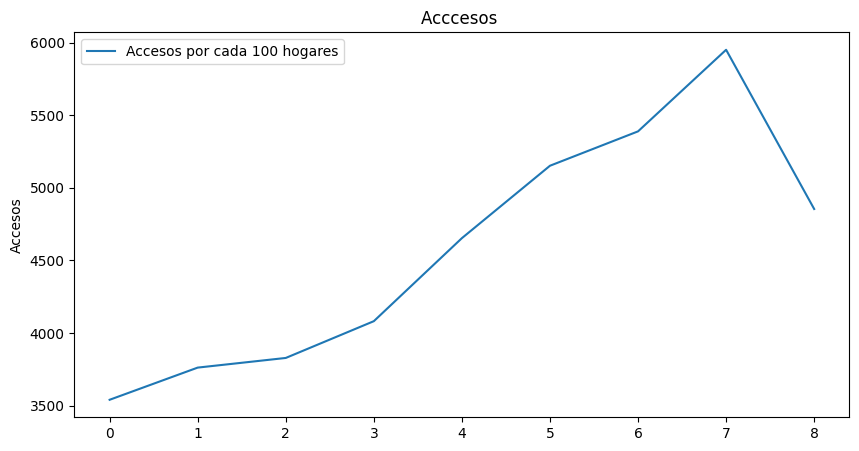

In [76]:


# Creo la línea de tiempo
df_grouped.plot(kind='line', y='Accesos por cada 100 hogares', figsize=(10, 5))

# Agrego etiquetas y título al gráfico
plt.ylabel('Accesos')
plt.title('Acccesos ')
plt.show()

In [78]:
df_grouped.head()

,Trimestre,Accesos por cada 100 hogares
0,1,10291.56
1,2,10603.69
2,3,10961.58
3,4,9358.40


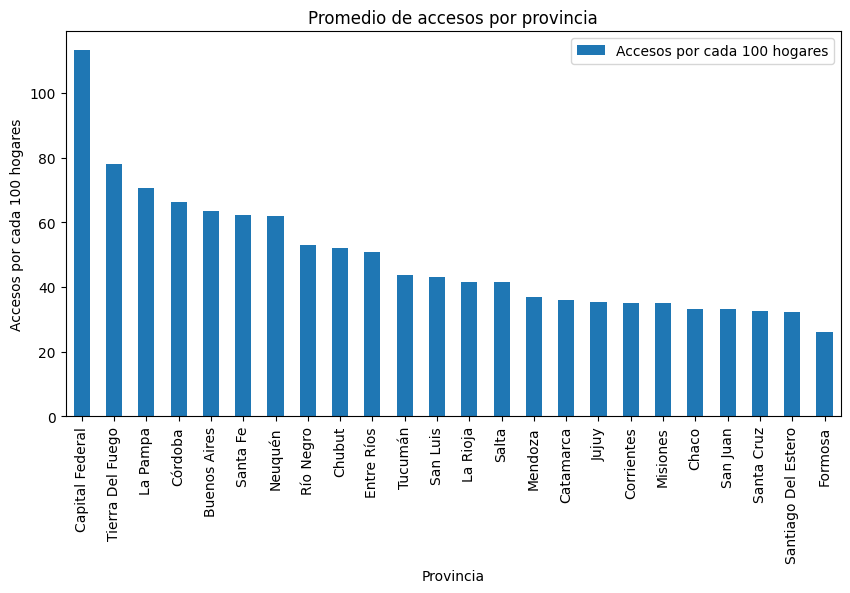

In [81]:
provincia_group = penetracion_hogares.groupby('Provincia').mean().sort_values('Accesos por cada 100 hogares', ascending=False)
provincia_group.plot(kind='bar', y='Accesos por cada 100 hogares', figsize=(10, 5))
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Promedio de accesos por provincia')
plt.show()

Analizamos la velocidad por provincia

In [93]:
velocidad_promedio_provincia.head()

,Unnamed: 0,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,0,2022,3,Buenos Aires,70,0,0
1,1,2022,3,Capital Federal,101,0,0
2,2,2022,3,Catamarca,61,0,0
3,3,2022,3,Chaco,53,0,0
4,4,2022,3,Chubut,16,0,0


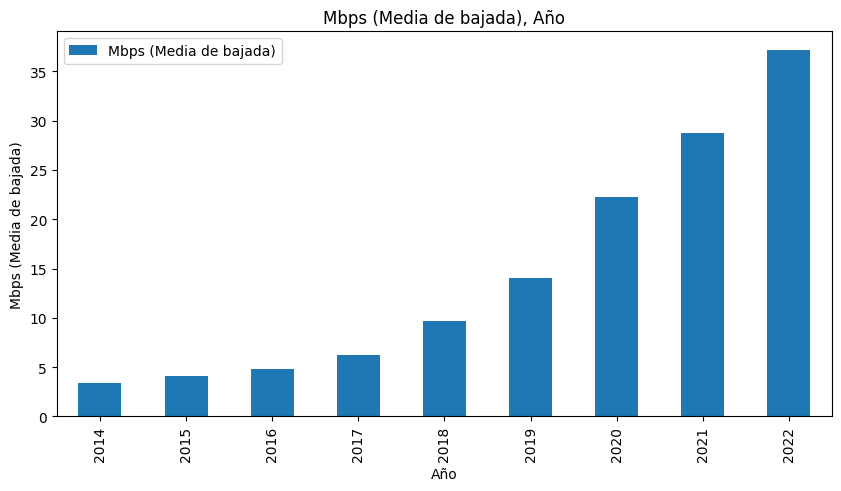

In [97]:
provincia_group = velocidad_promedio_provincia.groupby('Año').mean().sort_values('Mbps (Media de bajada)', ascending=True)
provincia_group.plot(kind='bar', y="Mbps (Media de bajada)", figsize=(10, 5))
plt.ylabel('Mbps (Media de bajada)')
plt.title('Mbps (Media de bajada), Año')
plt.show()